In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Load the dataset
df_t = pd.read_csv("test.csv")
df_t.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Data Preprocessing Zone

In [3]:
df_t.drop(['Loan_ID'],inplace=True,axis=1)

In [4]:
# Checking number of the columns
len((df_t))

367

In [5]:
# Shape of the dataset
df_t.shape

(367, 11)

In [6]:
# Checking the name of the columns
df_t.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
# checking the null values
df_t.isnull()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,True,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# Checking the sum of the null vlaues
df_t.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

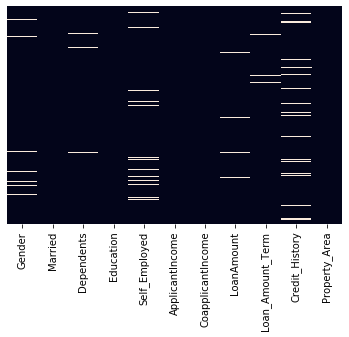

In [9]:
# Visualize the null values using heatmap
sns.heatmap(df_t.isnull(),yticklabels=False,cbar=False)

In [10]:
# Data Observation
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 31.6+ KB


### Handling the Null / Missing Values in Numerical Values

In [11]:
# Using fillna methods to fillup the maean of the features
df_t['LoanAmount'] = df_t['LoanAmount'].fillna(df_t['LoanAmount'].mean())
df_t['Loan_Amount_Term'] = df_t['Loan_Amount_Term'].fillna(df_t['Loan_Amount_Term'].mean())
df_t['Credit_History'] = df_t['Credit_History'].fillna(df_t['Credit_History'].mean())

In [12]:
df_t.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

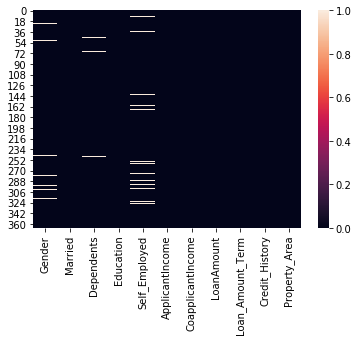

In [13]:
# After handling the Numerical missing valeu
sns.heatmap(df_t.isnull())

###  Handling the Null / Missing Values in Gategorical Values

In [14]:
# Knowing the value counts
df_t['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [15]:
df_t['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [16]:
df_t['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [17]:
# Converting the numerical values using get_dummies
Gender = pd.get_dummies(df_t['Gender'],drop_first=True)
Dependents = pd.get_dummies(df_t['Dependents'],drop_first=True)
Self_Employed = pd.get_dummies(df_t['Self_Employed'],drop_first=True)

In [18]:
# Displays the Converted features
Gender.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [19]:
Dependents.head()

,1,2,3+
0,0,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,0


In [20]:
Self_Employed.head()

,Yes
0,0
1,0
2,0
3,0
4,0


In [21]:
df_t.drop(['Gender','Dependents','Self_Employed'],axis=1,inplace=True)

In [22]:
df_t.head()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Yes,Graduate,5720,0,110.0,360.0,1.000000,Urban
1,Yes,Graduate,3076,1500,126.0,360.0,1.000000,Urban
2,Yes,Graduate,5000,1800,208.0,360.0,1.000000,Urban
3,Yes,Graduate,2340,2546,100.0,360.0,0.825444,Urban
4,No,Not Graduate,3276,0,78.0,360.0,1.000000,Urban


In [23]:
# Concating the existing Features with new one
df_t = pd.concat([df_t,Gender,Dependents,Self_Employed],axis=1)

In [24]:
df_t.head()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Male,1,2,3+,Yes
0,Yes,Graduate,5720,0,110.0,360.0,1.000000,Urban,1,0,0,0,0
1,Yes,Graduate,3076,1500,126.0,360.0,1.000000,Urban,1,1,0,0,0
2,Yes,Graduate,5000,1800,208.0,360.0,1.000000,Urban,1,0,1,0,0
3,Yes,Graduate,2340,2546,100.0,360.0,0.825444,Urban,1,0,1,0,0
4,No,Not Graduate,3276,0,78.0,360.0,1.000000,Urban,1,0,0,0,0


In [25]:
# Converting Other Gategorical Features
# Counts values
df_t['Married'].value_counts().head()

Yes    233
No     134
Name: Married, dtype: int64

In [26]:
df_t['Education'].value_counts().head()

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

In [27]:
df_t['Property_Area'].value_counts().head()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

In [28]:
Married = pd.get_dummies(df_t['Married'],drop_first=True)
Education = pd.get_dummies(df_t['Education'],drop_first=True)
Property_Area = pd.get_dummies(df_t['Property_Area'],drop_first=True)

In [29]:
df_t.drop(['Married','Education','Property_Area'],axis=1,inplace=True)

In [30]:
# Concating the existing Features with new one
df_t = pd.concat([df_t,Married,Education,Property_Area],axis=1)

In [31]:
df_t.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,1,2,3+,Yes,Yes,Not Graduate,Semiurban,Urban
0,5720,0,110.0,360.0,1.000000,1,0,0,0,0,1,0,0,1
1,3076,1500,126.0,360.0,1.000000,1,1,0,0,0,1,0,0,1
2,5000,1800,208.0,360.0,1.000000,1,0,1,0,0,1,0,0,1
3,2340,2546,100.0,360.0,0.825444,1,0,1,0,0,1,0,0,1
4,3276,0,78.0,360.0,1.000000,1,0,0,0,0,0,1,0,1


In [32]:
df_t.to_csv('formulatedtest.csv',index=False)

In [33]:
sns.countplot(y = 'Male',hue='y',data=df_t)

ValueError: Could not interpret input 'y'